In [224]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt
from torch.nn import functional as fnn

from train import main

In [225]:
#!g1.1
loss_fn_lst = [fnn.l1_loss]#, fnn.smooth_l1_loss]#, fnn.mse_loss]

for loss_fn in loss_fn_lst:
    request = Namespace(
        name=f'resnext50_{loss_fn.__name__}_CyclicLR_64000_10',
        data_folder='data',
        data_size=64_000,
        crop_size=256,
        batch_size=32,
        epochs=10,
        learning_rate=0.001,
        gpu=True,
        worker=1
    )
    main(request, loss_fn)

Reading data...
Creating model...

Tune optimizer...
Ready for training with model=resnext50_32x4d, loss=l1_loss, scheduler=CosineAnnealingWarmRestarts, data_size=64000 ...
Epoch # 0:	train loss: 3.3e+01	val loss: 5.6e+01
Epoch # 1:	train loss:   4.0	val loss: 1.9e+01
Epoch # 2:	train loss:   3.1	val loss: 1.7e+01
Epoch # 3:	train loss:   3.0	val loss: 2e+01
Epoch # 4:	train loss:   2.6	val loss: 1e+01
Epoch # 5:	train loss:   2.4	val loss: 1.3e+01
Epoch # 6:	train loss:   2.4	val loss:   9.9
Epoch # 7:	train loss:   2.2	val loss:   9.7
Epoch # 8:	train loss:   2.2	val loss:   9.8
Epoch # 9:	train loss:   2.1	val loss:   8.2
Create submission...
Check answer in train data...


prediction...: 100%|██████████| 500/500 [01:50<00:00,  4.51it/s]


TypeError: __init__() got an unexpected keyword argument 'train_size'

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


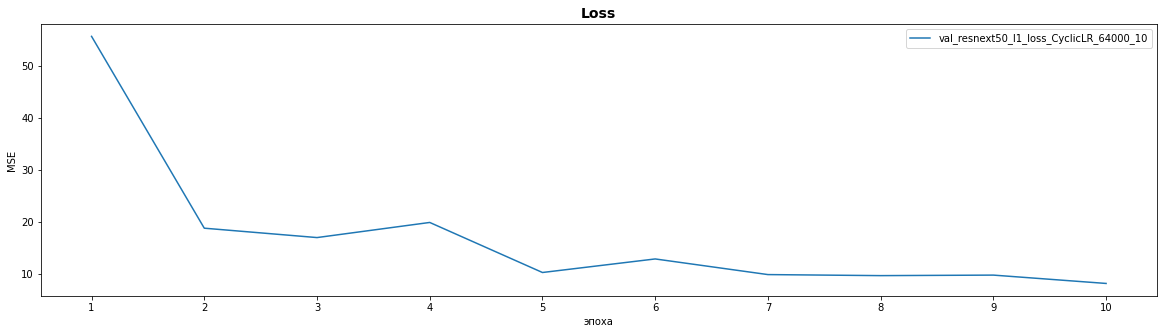

In [228]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

for experiment, ls in [
    ('resnext50_l1_loss_CyclicLR_64000_10', 'solid'),
#     ('resnext50_smooth_l1_loss_16000_10', 'solid'),
#     ('resnext50_l1_loss_CyclicLR_16000_10', 'dotted'),
#     ('resnext50_smooth_l1_loss_CyclicLR_16000_10', 'dotted'),
#     ('resnext50_l1_loss_CosineAnnealingWarmRestarts_16000_10', 'dashed'),
#     ('resnext50_smooth_l1_loss_CosineAnnealingWarmRestarts_16000_10', 'dashed'),
]:
    
    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    #ls = 'solid' if (experiment=='resnext50_mse_loss_16000_10') or (experiment=='loss_mse') else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
#ax.set_ylim([15, 40])